In [1]:
# Housing Market Project 1
# Collaborators: Jackie Bai, Rosalyn Brown & Thomas Scott
#Due Date: June 15th, 2021 (presentation - June 12th)

In [1]:
#We probably won't need all of these, but better to have them.
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import csv
import requests
from pathlib import Path

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data sets

#Fannie Histrical performance dataset

FM_Hist_Performance = Path('../Data/HistoricalPerformance.csv')

#Fannie Orgination dataset

FM_Historical_Origination = Path('../Data/HistoricalOrigination.csv')

#St. Louis Fed: Fed Funds Rate

Fed_Funds = Path('../Data/FEDFUNDS.csv')

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg = Path('../Data/Freddie_Mac_30_yr_Fixed_Rate.csv')

#S&P Schiller home price index

Schiller_index = Path('../Data/CSUSHPINSA.csv')

In [3]:
# Create dataframes

#Fannie Histrical performance

FM_Hist_Performance_df = pd.read_csv(FM_Hist_Performance, encoding='Latin-1')

#Fannie Orgination

FM_Historical_Origination_df = pd.read_csv(FM_Historical_Origination, encoding='Latin-1')

#St. Louis Fed: Fed Funds Rate

Fed_Funds_df = pd.read_csv(Fed_Funds)

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg_df = pd.read_csv(Fixed_rate_mtg)

#S&P Schiller home price index

Schiller_index_df = pd.read_csv(Schiller_index)

In [4]:
#Display sample dataframe

Schiller_index_df.head()

DATE  CSUSHPINSA
0  2000-01-01  104.776083
1  2001-01-01  113.184333
2  2002-01-01  122.286833
3  2003-01-01  133.740750
4  2004-01-01  150.463333

In [5]:
##Merge datasets into consolidated dataframe & drop nulls

Combined_dataframe = pd.concat([FM_Hist_Performance_df, FM_Historical_Origination_df.drop(columns='Unnamed: 0'), Fixed_rate_mtg_df.drop(columns='DATE'), Fed_Funds_df.drop(columns='DATE'), Schiller_index_df.drop(columns='DATE')], axis = 1).dropna()

#Reset index and drop duplicate index
                         
Combined_df = Combined_dataframe.reset_index().drop(columns='index')

#Rename year column

Combined_df.rename(columns = {'Unnamed: 0': 'Year'}, inplace = True)

#Display data

Combined_df.head(21)

#Note to collaborators, all the data/ columns are present in the dataframe. 
#Jupyter just adds the ... to save space and display the data in an abridged format. 
#Try exporting the data to a CSV using 'to_csv' in pandas and you will see what I mean.

Year Number of Records Origination UPB ($M) % Active % Prepay  \
0   2000         1,268,238             $160,749    0.21%   94.34%   
1   2001         3,371,992             $472,779    0.35%   89.92%   
2   2002         3,857,380             $564,732    0.70%   84.44%   
3   2003         5,107,654             $778,021    1.69%   73.00%   
4   2004         1,744,573             $274,074    2.63%   74.07%   
5   2005         1,446,029             $252,240    3.46%   73.89%   
6   2006         1,080,688             $198,677    3.30%   76.35%   
7   2007         1,252,482             $245,737    3.76%   76.42%   
8   2008         1,491,789             $315,022    2.96%   82.55%   
9   2009         2,363,088             $522,072    5.48%   79.26%   
10  2010         1,951,208             $432,356    8.37%   73.44%   
11  2011         1,661,838             $357,697   11.79%   68.62%   
12  2012         2,680,124             $608,106   24.99%   50.68%   
13  2013         2,207,361             $483,403   27.25%   51.61%   
14  2014         1,449,702             $311,589   22.88%   62.94%   
15  2015         1,869,437             $423,209   33.19%   52.76%   
16  2016         2,353,813             $555,052   44.80%   42.32%   
17  2017         2,014,548             $462,000   44.32%   46.44%   
18  2018         1,787,446             $419,622   39.74%   54.53%   
19  2019         2,211,117             $581,664   58.91%   37.44%   
20  2020         4,563,123           $1,279,762   93.54%    5.05%   

   % Repurchase  % TPS % Short Sale  % REO  % NPL  ... Average CLTV  \
0         0.18%  0.10%        0.05%  0.71%  0.01%  ...       77.90%   
1         0.10%  0.08%        0.05%  0.60%  0.02%  ...       73.20%   
2         0.10%  0.09%        0.06%  0.60%  0.03%  ...       69.90%   
3         0.10%  0.16%        0.13%  0.79%  0.07%  ...       67.90%   
4         0.15%  0.25%        0.43%  1.66%  0.15%  ...       70.90%   
5         0.23%  0.38%        1.42%  3.43%  0.27%  ...       71.70%   
6         0.38%  0.39%        2.22%  4.92%  0.34%  ...       72.50%   
7         0.83%  0.38%        2.40%  5.34%  0.42%  ...       74.30%   
8         0.71%  0.19%        1.13%  2.58%  0.23%  ...       73.30%   
9         0.12%  0.05%        0.15%  0.37%  0.05%  ...       67.80%   
10        0.07%  0.03%        0.04%  0.13%  0.03%  ...       68.20%   
11        0.04%  0.02%        0.02%  0.09%  0.02%  ...       69.70%   
12        0.05%  0.02%        0.01%  0.05%  0.01%  ...       70.20%   
13        0.17%  0.02%        0.01%  0.06%  0.01%  ...       73.50%   
14        0.16%  0.03%        0.02%  0.08%  0.01%  ...       77.20%   
15        0.09%  0.02%        0.01%  0.05%  0.00%  ...       75.90%   
16        0.05%  0.01%        0.01%  0.03%  0.00%  ...       74.30%   
17        0.07%  0.01%        0.01%  0.03%  0.00%  ...       76.80%   
18        0.10%  0.01%        0.01%  0.02%  0.00%  ...       78.30%   
19        0.11%  0.00%        0.00%  0.00%  0.00%  ...       76.20%   
20        0.03%  0.00%        0.00%  0.00%  0.00%  ...       71.50%   

   Average DTI Average Note Rate % Investor % Cashout    % CA WA Risk Layers  \
0       35.40%             8.10%      3.60%    14.30%  14.30%           0.68   
1       33.30%             6.85%      3.90%    31.70%  18.10%           0.81   
2       32.90%             6.31%      4.50%    33.70%  19.20%           0.81   
3       32.60%             5.54%      4.50%    34.20%  20.90%           0.81   
4       35.70%             5.69%      4.10%    34.50%  18.20%           0.94   
5       37.60%             5.78%      3.80%    43.40%  14.20%           1.02   
6       38.80%             6.39%      4.90%    42.60%  11.80%           1.07   
7       38.90%             6.33%      6.10%    41.10%  11.70%           1.08   
8       37.90%             5.96%      6.40%    32.00%  18.40%           0.81   
9       33.60%             4.91%      2.90%    31.50%  20.90%           0.56   
10      31.80%             4.54%      4.60

In [4]:
#Define functions

<AxesSubplot:xlabel='Year'>

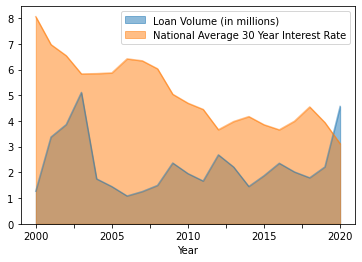

In [6]:
#1. Line plot of total loan volume & interest rate (Tom)

Set_Rate_as_Index = Combined_df.set_index('Year')

Only_Origination = Set_Rate_as_Index[['Orig. Loan Count', 'MORTGAGE30US']]

Only_Origination['Orig. Loan Count'] = Only_Origination['Orig. Loan Count'].str.replace(',','')

To_Int = Only_Origination[['Orig. Loan Count', 'MORTGAGE30US']].astype(float)

To_Int_Reset_Index = To_Int.reset_index()

To_Int_Reset_Index['Year'] = To_Int_Reset_Index['Year'].astype(str)

To_Int_Reset_Index = To_Int_Reset_Index.set_index('Year')

To_Int_Reset_Index['Loan Volume (in millions)'] = To_Int_Reset_Index['Orig. Loan Count'] / 1000000

To_Int_Reset_Index['National Average 30 Year Interest Rate'] = To_Int_Reset_Index['MORTGAGE30US']

To_Int_Reset_Index = To_Int_Reset_Index.drop(columns = ['Orig. Loan Count', 'MORTGAGE30US'])


Inverse_Plot = To_Int_Reset_Index.plot.area(stacked=False)

Inverse_Plot

                                        Loan Volume (in millions)  \
Loan Volume (in millions)                                1.000000   
National Average 30 Year Interest Rate                  -0.134751   

                                        National Average 30 Year Interest Rate  
Loan Volume (in millions)                                            -0.134751  
National Average 30 Year Interest Rate                                1.000000  


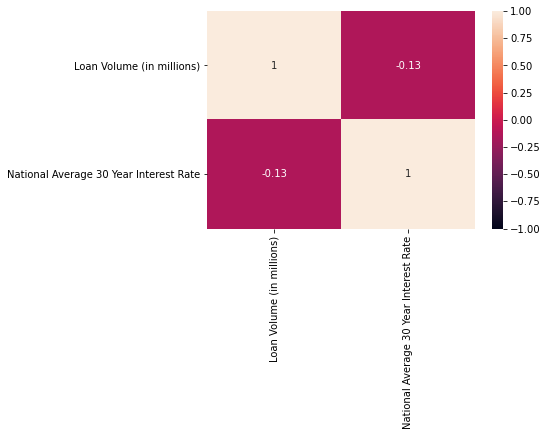

In [8]:
#Show correlation between interest rate and LTV

LTV_Rate_Corr = To_Int_Reset_Index.corr()

print(LTV_Rate_Corr)

LTV_Rate_Corr_Heatmap = sns.heatmap(LTV_Rate_Corr, annot=True, vmax=1, vmin=-1)


<AxesSubplot:xlabel='Year'>

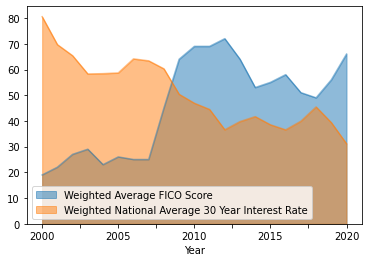

In [9]:
#2. Create line plot of FICO scores for period between 2000-2020 (Tom)

FICO = Combined_df.set_index('Year')

FICO_Plot = FICO[['Average Borrower FICO', 'MORTGAGE30US']]

FICO_Plot['Weighted Average FICO Score'] = FICO_Plot['Average Borrower FICO'].astype(float) -700 

FICO_Plot['Weighted National Average 30 Year Interest Rate'] = FICO_Plot['MORTGAGE30US'].astype(float) * 10

FICO_Reset_Index = FICO_Plot.reset_index()

FICO_Reset_Index['Year'] = FICO_Reset_Index['Year'].astype(str)

#FICO_Reset_Index

FICO_Line_Plot = FICO_Reset_Index.plot.area('Year', ['Weighted Average FICO Score', 'Weighted National Average 30 Year Interest Rate'], stacked=False)

FICO_Line_Plot

                                                 Weighted Average FICO Score  \
Weighted Average FICO Score                                         1.000000   
Weighted National Average 30 Year Interest Rate                    -0.863102   

                                                 Weighted National Average 30 Year Interest Rate  
Weighted Average FICO Score                                                            -0.863102  
Weighted National Average 30 Year Interest Rate                                         1.000000  


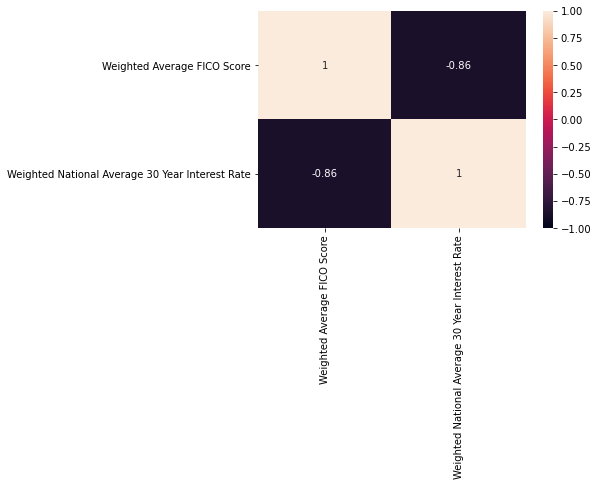

In [10]:
#Show Interest Rate and FICO correlation

Interest_Rate_FICO = FICO_Reset_Index.set_index('Year')

Interest_Rate_FICO = Interest_Rate_FICO.drop(columns = ['Average Borrower FICO','MORTGAGE30US'])

Interest_Rate_FICO_Corr = Interest_Rate_FICO.corr()

print(Interest_Rate_FICO_Corr)

Interest_Rate_FICO_Corr_Plot = sns.heatmap(Interest_Rate_FICO_Corr, annot=True, vmax=1, vmin=-1)

<AxesSubplot:xlabel='Year'>

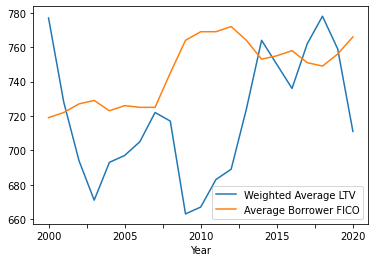

In [11]:
#3. Show line plot heatmap correlation for FICO & LTV (remember to remove percentage) (Tom)

LTV_Compare = Combined_df.set_index('Year')

LTV_Compare_df = LTV_Compare[['Average Borrower FICO', 'Average LTV']]

LTV_Compare_df['Average LTV'] = LTV_Compare_df['Average LTV'].str.replace('%','')

LTV_Compare_df['Weighted Average LTV'] = LTV_Compare_df['Average LTV'].astype(float) * 10

LTV_Compare_df = LTV_Compare_df.drop(columns = ['Average LTV'])

LTV_Compare_df = LTV_Compare_df.reset_index()

LTV_Compare_df['Year'] = LTV_Compare_df['Year'].astype(str)

LTV_Plot = LTV_Compare_df.plot.line('Year', ['Weighted Average LTV', 'Average Borrower FICO'], stacked=False)

LTV_Plot

                       Average LTV  Average Borrower FICO
Average LTV               1.000000              -0.112242
Average Borrower FICO    -0.112242               1.000000


<AxesSubplot:>

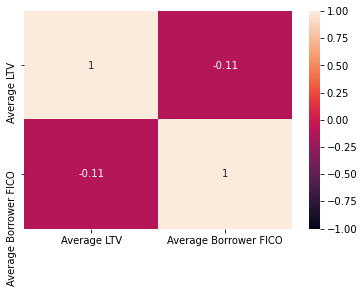

In [12]:
#Plot Correlation

LTV_Compare_Corr = Combined_df[['Average LTV', 'Average Borrower FICO']]

LTV_Compare_Corr['Average LTV'] = LTV_Compare_Corr['Average LTV'].str.replace('%','')

LTV_Compare_Corr['Average LTV'] = LTV_Compare_Corr['Average LTV'].astype(float)

LTV_Compare_Corr['Average Borrower FICO'] = LTV_Compare_Corr['Average Borrower FICO'].astype(float) / 10

Correlation = LTV_Compare_Corr.corr()

print(Correlation)

Correlation_Plot = sns.heatmap(Correlation, annot=True, vmax=1, vmin=-1)

Correlation_Plot


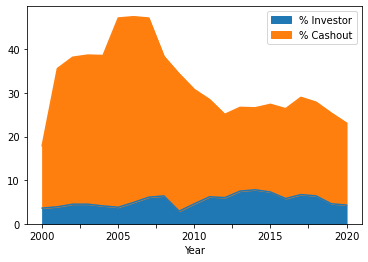

In [15]:
#4. Show investor property correlation percentage to cash out refi percentage (Tom)
Investor_Property = Combined_df[['Year', '% Investor', '% Cashout']]

Investor_Property['Year'] = Investor_Property['Year'].astype(str)

Investor_Property = Investor_Property.set_index('Year')

Investor_Property['% Investor'] = Investor_Property['% Investor'].str.replace('%','')

Investor_Property['% Investor'] = Investor_Property['% Investor'].astype(float)

Investor_Property['% Cashout'] = Investor_Property['% Cashout'].str.replace('%','')

Investor_Property['% Cashout'] = Investor_Property['% Cashout'].astype(float)

Investor_Property_Plot = Investor_Property.plot.area(stacked=True)



            % Investor  % Cashout
% Investor    1.000000  -0.380133
% Cashout    -0.380133   1.000000


<AxesSubplot:>

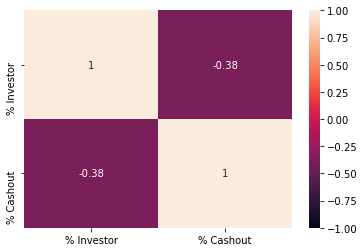

In [18]:
#Plot correlation

Investor_Corr = Investor_Property.corr()

print(Investor_Corr)
Investor_Heatmap = sns.heatmap(Investor_Corr, annot=True, vmax=1, vmin=-1)

Investor_Heatmap

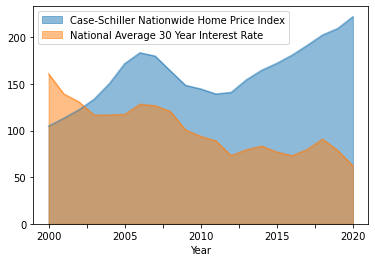

In [19]:
#5. Interest rate correlated with home price index (weighted) (Tom)
Schiller_df = Combined_df[['Year', 'Average Note Rate', 'MORTGAGE30US', 'CSUSHPINSA']]

Schiller_df['Average Note Rate'] = Schiller_df['Average Note Rate'].str.replace('%','')

Schiller_df['Average Note Rate'] = Schiller_df['Average Note Rate'].astype(float)

Schiller_df[['Average Fannie Mae Interest Rate', 'National Average 30 Year Interest Rate']] = Schiller_df[['Average Note Rate', 'MORTGAGE30US']] * 20

Schiller_df['Case-Schiller Nationwide Home Price Index'] = Schiller_df['CSUSHPINSA']
    
Schiller_df = Schiller_df.drop(columns = ['Average Note Rate', 'MORTGAGE30US', 'CSUSHPINSA'])

Schiller_df['Year'] = Schiller_df['Year'].astype(str)

Schiller_Plot = Schiller_df.plot.area('Year', ['Case-Schiller Nationwide Home Price Index', 'National Average 30 Year Interest Rate'], stacked = False)


                                           National Average 30 Year Interest Rate  \
National Average 30 Year Interest Rate                                   1.000000   
Case-Schiller Nationwide Home Price Index                               -0.600997   

                                           Case-Schiller Nationwide Home Price Index  
National Average 30 Year Interest Rate                                     -0.600997  
Case-Schiller Nationwide Home Price Index                                   1.000000  


<AxesSubplot:>

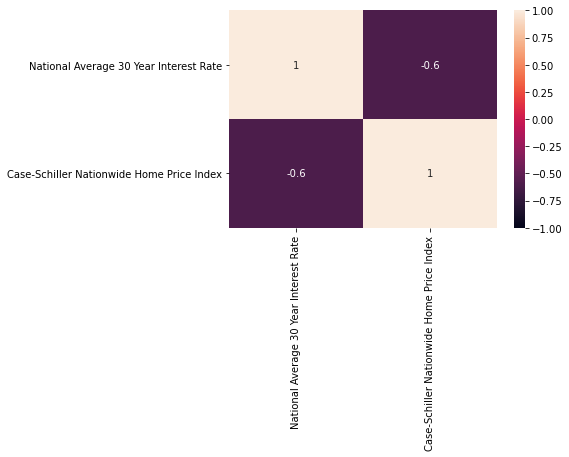

In [20]:
#Plot Schiller correlation

Schiller_Year_Index = Schiller_df.set_index('Year')

Schiller_Corr = Schiller_Year_Index.drop(columns = 'Average Fannie Mae Interest Rate')

Schiller_Corr = Schiller_Corr.corr()

print(Schiller_Corr)

Schiller_Corr_Plot = sns.heatmap(Schiller_Corr, annot=True, vmax=1, vmin=-1)

Schiller_Corr_Plot

<AxesSubplot:xlabel='Year'>

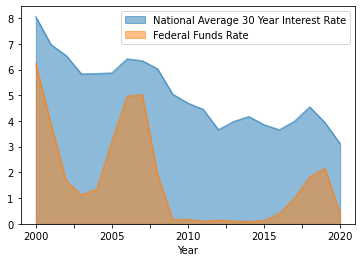

In [30]:
#Compare & contrast interest rates to show that they are not a perfect match

Interest_Rate_Comparison = Combined_df[['Year','MORTGAGE30US', 'FEDFUNDS']]

Interest_Rate_Comparison['Year'] = Interest_Rate_Comparison['Year'].astype(str)

Interest_Rate_Comparison = Interest_Rate_Comparison.set_index('Year')

Interest_Rate_Comparison[['National Average 30 Year Interest Rate', 'Federal Funds Rate']] = Interest_Rate_Comparison[['MORTGAGE30US', 'FEDFUNDS']]

Interest_Rate_Comparison = Interest_Rate_Comparison.drop(columns = ['MORTGAGE30US', 'FEDFUNDS'])

Interest_Rate_Area_Plot = Interest_Rate_Comparison.plot.area(stacked=False)

Interest_Rate_Area_Plot


                                        National Average 30 Year Interest Rate  \
National Average 30 Year Interest Rate                                1.000000   
Federal Funds Rate                                                    0.806333   

                                        Federal Funds Rate  
National Average 30 Year Interest Rate            0.806333  
Federal Funds Rate                                1.000000  


<AxesSubplot:>

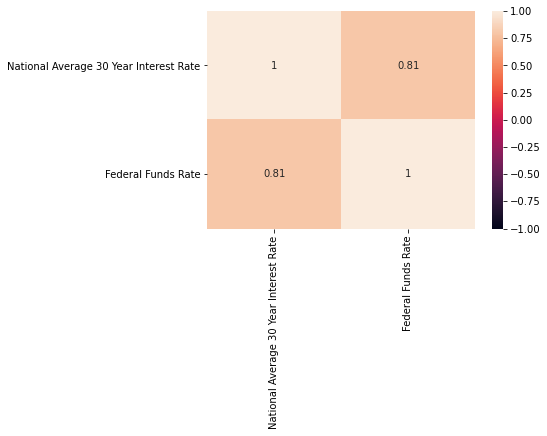

In [32]:
#Show correlation between interest rates
Interest_Rate_Correlation = Interest_Rate_Comparison.corr()

print(Interest_Rate_Correlation)

Interest_Rate_Heatmap = sns.heatmap(Interest_Rate_Correlation, annot=True, vmax=1, vmin=-1)

Interest_Rate_Heatmap

                      Origination UPB ($M)  Active UPB ($M)  Average LTV
Origination UPB ($M)              1.000000         0.817893    -0.201687
Active UPB ($M)                   0.817893         1.000000     0.135929
Average LTV                      -0.201687         0.135929     1.000000


<AxesSubplot:>

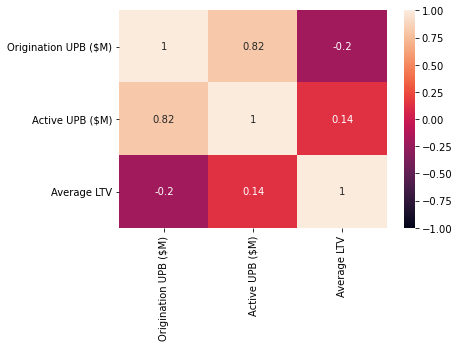

In [35]:
#6. Percent change of orig. UPB with percentage change in LTV (Rosalyn)
UPB_df = Combined_df[['Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']]
UPB_df = UPB_df.loc[:,~UPB_df.columns.duplicated()]
UPB_df['Origination UPB ($M)'] = UPB_df['Origination UPB ($M)'].str.replace(r'\W', '')
UPB_df['Active UPB ($M)'] = UPB_df['Active UPB ($M)'].str.replace(r'\W', '')
UPB_df['Average LTV'] = UPB_df['Average LTV'].str.replace('%', '')
UPB_df[['Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']] = UPB_df[['Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']].astype(float)

percent_change_corr = UPB_df.corr()
print(percent_change_corr)
percent_change_UPB_heatmap = sns.heatmap(percent_change_corr, annot= True, vmax=1, vmin=-1)
percent_change_UPB_heatmap

<AxesSubplot:xlabel='Year'>

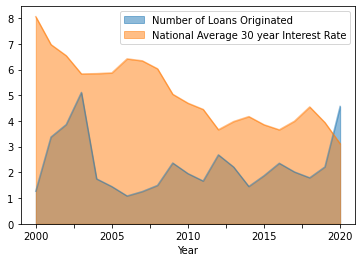

In [40]:
#9. Plot interest rate against number of loans (weight number of loans by dividing by number of million and casting to float)
#(Rosalyn)
Loan_Count_df = Combined_df[['Year', 'Orig. Loan Count', 'MORTGAGE30US']]
Loan_Count_df['Number of Loans Originated'] = Loan_Count_df['Orig. Loan Count'].str.replace(',','').astype(float) / 1000000
Loan_Count_df['National Average 30 year Interest Rate'] = Loan_Count_df['MORTGAGE30US']
Loan_Count_df = Loan_Count_df.drop(columns = ['Orig. Loan Count', 'MORTGAGE30US'])
Loan_Count_df['Year'] = Loan_Count_df['Year'].astype(str)
Loan_Count_df = Loan_Count_df.set_index('Year')
Loan_Count_plot = Loan_Count_df.plot.area(stacked=False)
Loan_Count_plot

                                        Number of Loans Originated  \
Number of Loans Originated                                1.000000   
National Average 30 year Interest Rate                   -0.134751   

                                        National Average 30 year Interest Rate  
Number of Loans Originated                                           -0.134751  
National Average 30 year Interest Rate                                1.000000  


<AxesSubplot:>

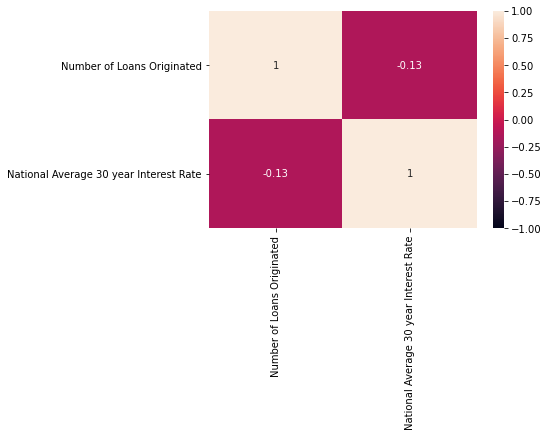

In [41]:
#Plot correlation between origination volume & interest rate
Loan_Count_Corr = Loan_Count_df.corr()

print(Loan_Count_Corr)

Loan_Count_Corr_Plot = sns.heatmap(Loan_Count_Corr, annot=True, vmax=1, vmin=-1)

Loan_Count_Corr_Plot

<AxesSubplot:xlabel='Year'>

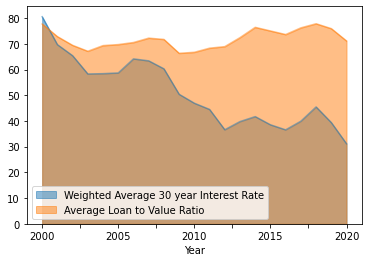

In [92]:
#10. Plot prepayment percentage versus interest rate (Rosalyn)
#'% Prepay',
prepayment_pct = Combined_df[['Year', 'MORTGAGE30US','Average LTV']]

prepayment_pct['Year'] = prepayment_pct['Year'].astype(str)
prepayment_pct = prepayment_pct.set_index('Year')

prepayment_pct[['Weighted Average 30 year Interest Rate', 'Average Loan to Value Ratio']] = prepayment_pct[['MORTGAGE30US', 'Average LTV']]

prepayment_pct_new = prepayment_pct.drop(columns = ['MORTGAGE30US', 'Average LTV'])

#prepayment_pct_new['Percent of Loans Prepaid'] = prepayment_pct_new['Percent of Loans Prepaid'].str.replace('%', '')
#prepayment_pct_new['Percent of Loans Prepaid'] = prepayment_pct_new['Percent of Loans Prepaid'].astype(float)

prepayment_pct_new['Average Loan to Value Ratio'] = prepayment_pct_new['Average Loan to Value Ratio'].str.replace('%', '')
prepayment_pct_new['Average Loan to Value Ratio'] = prepayment_pct_new['Average Loan to Value Ratio'].astype(float)

prepayment_pct_new['Weighted Average 30 year Interest Rate'] = prepayment_pct_new['Weighted Average 30 year Interest Rate'] *10

prepayment_pct_plot = prepayment_pct_new.plot.area(stacked=False)

prepayment_pct_plot

                                        Weighted Average 30 year Interest Rate  \
Weighted Average 30 year Interest Rate                                1.000000   
Average Loan to Value Ratio                                          -0.068502   

                                        Average Loan to Value Ratio  
Weighted Average 30 year Interest Rate                    -0.068502  
Average Loan to Value Ratio                                1.000000  


<AxesSubplot:>

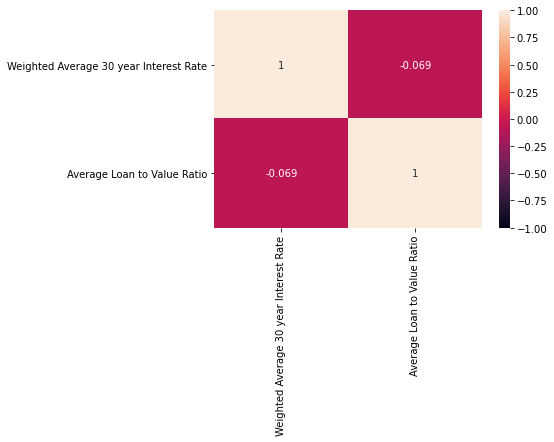

In [93]:
#Show heatmap correlation
prepayment_pct_corr = prepayment_pct_new.corr()
print(prepayment_pct_corr)
prepayment_pct_heatmap = sns.heatmap(prepayment_pct_corr, annot=True, vmax=1, vmin=-1)
prepayment_pct_heatmap

In [94]:
#11. Prepayment versus Case-Schiller index (prepayment down as asset prices increase) (Jackie)

df11 = Combined_df[['Year', '% Prepay', 'CSUSHPINSA']]
df11['Year'] = df11['Year'].astype(str)

#df11 = df11.set_index('Year')
df11['% Prepay'] = df11['% Prepay'].str.replace(r'%', r'').astype('float')               # convert percentage string to numerical type


In [95]:
#Check Data
df11.head()

Year  % Prepay  CSUSHPINSA
0  2000     94.34  104.776083
1  2001     89.92  113.184333
2  2002     84.44  122.286833
3  2003     73.00  133.740750
4  2004     74.07  150.463333

Text(0, 0.5, 'Case-Schiller Home Price Index')

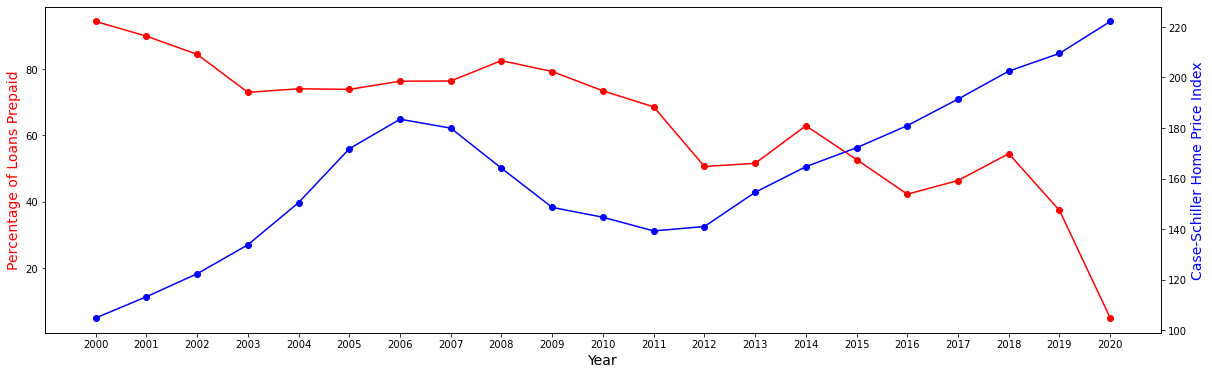

In [96]:
#Plot dataframe
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df11.Year, df11['% Prepay'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Percentage of Loans Prepaid",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df11.Year, df11['CSUSHPINSA'],color="blue",marker="o")
ax2.set_ylabel("Case-Schiller Home Price Index",color="blue",fontsize=14)


Text(0, 0.5, 'Average Loan to Value Ratio')

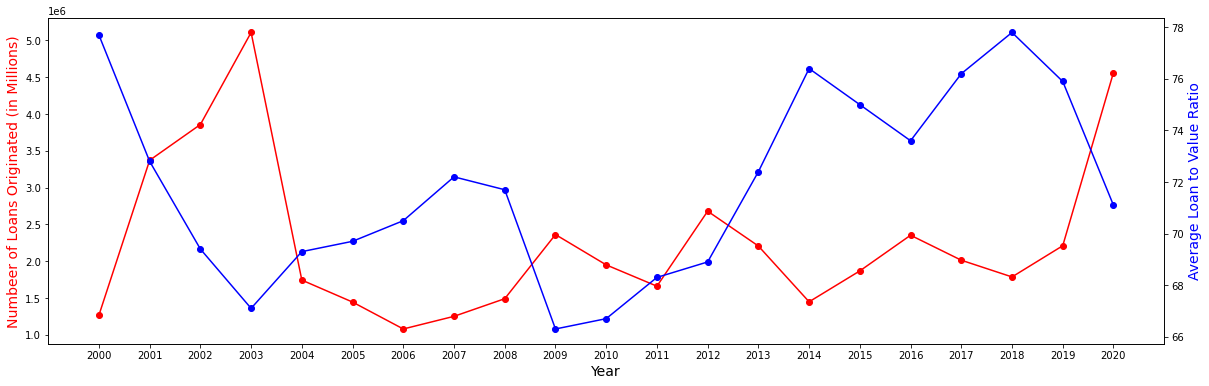

In [98]:
#12. Plot loan volume vs. LTV (Jackie)
df12 = Combined_df[['Year', 'Orig. Loan Count', 'Average LTV']]

df12['Year'] = df12['Year'].astype(str)

df12['Average LTV'] = df12['Average LTV'].str.replace(r'%', r'').astype('float')               # convert percentage string to numerical type
df12['Orig. Loan Count'] = df12['Orig. Loan Count'].str.replace(r',', r'').astype('int')

# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df12.Year, df12['Orig. Loan Count'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Numbeer of Loans Originated (in Millions)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df12.Year, df12['Average LTV'],color="blue",marker="o")
ax2.set_ylabel("Average Loan to Value Ratio",color="blue",fontsize=14)

Text(0, 0.5, 'Average Borrower FICO Score')

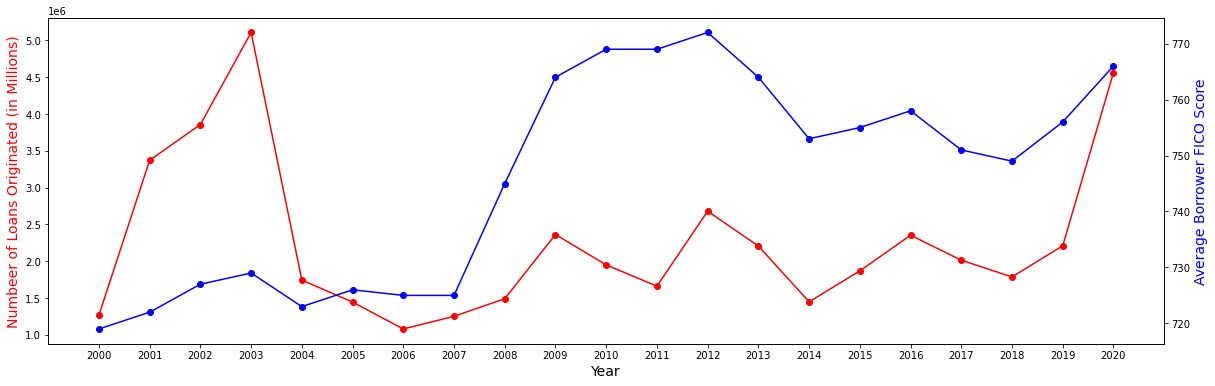

In [100]:
#13. Plot FICO vs. Loan volume (Jackie)
df13 = Combined_df[['Year', 'Average Borrower FICO', 'Orig. Loan Count']]

df13['Year'] = df13['Year'].astype(str)
df13['Orig. Loan Count'] = df13['Orig. Loan Count'].str.replace(r',', r'').astype('int')

# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df13.Year, df13['Orig. Loan Count'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Numbeer of Loans Originated (in Millions)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df13.Year, df13['Average Borrower FICO'],color="blue",marker="o")
ax2.set_ylabel("Average Borrower FICO Score",color="blue",fontsize=14)

In [19]:
#14. Plot DTI vs. LTV (Jackie)

Text(0, 0.5, 'Average Borrower FICO Score')

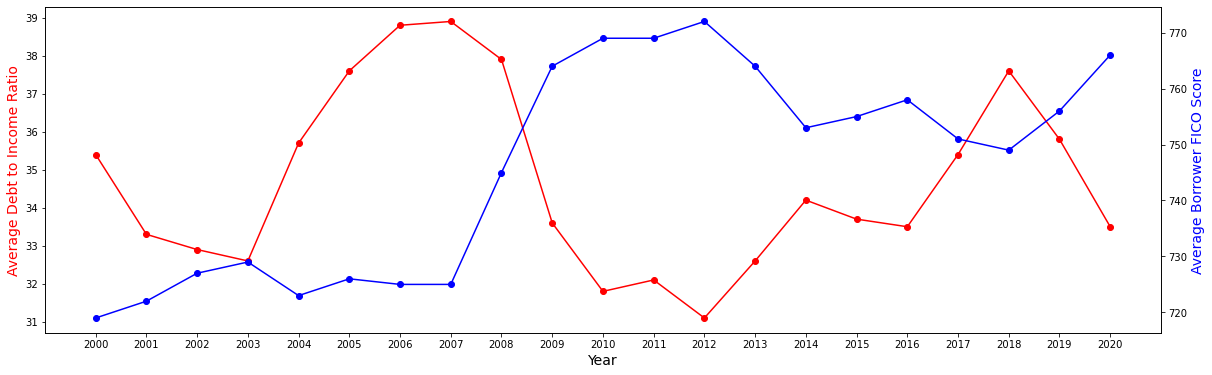

In [102]:
#15. Plot DTI vs. FICO (Jackie)
df15 = Combined_df[['Year', 'Average DTI', 'Average Borrower FICO']]
df15['Year'] = df15['Year'].astype(str)
df15['Average DTI'] = df15['Average DTI'].str.replace(r'%', r'').astype('float')


# Make a figure
fig,ax = plt.subplots(figsize=(20,6))
# make a plot
ax.plot(df15.Year, df15['Average DTI'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Average Debt to Income Ratio",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df15.Year, df15['Average Borrower FICO'],color="blue",marker="o")
ax2.set_ylabel("Average Borrower FICO Score",color="blue",fontsize=14)

In [ ]:
#Montecarlo simulation of Case-Schiller using Quandl